<a href="https://colab.research.google.com/github/ZynTran/Fuzzy_Logic/blob/main/Vidu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.9 MB/s eta 0:00:00


5.765541330527304


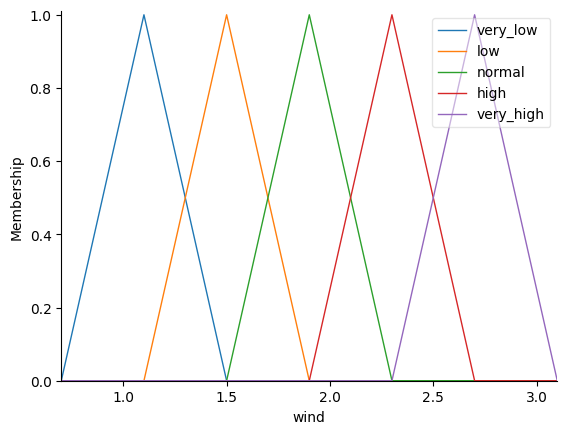

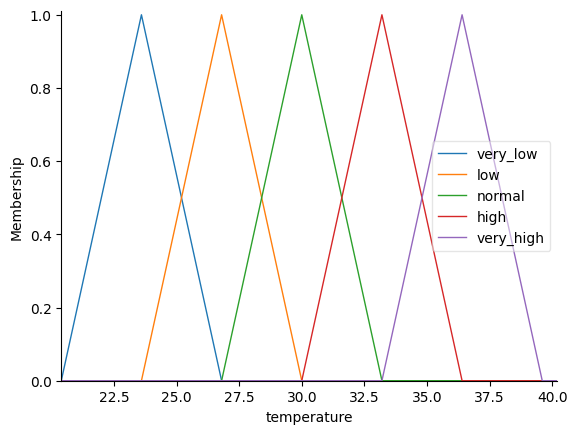

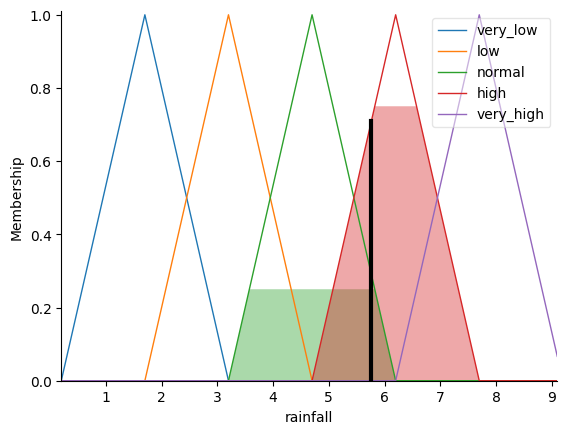

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind = ctrl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
temperature = ctrl.Antecedent(np.arange(20.4, 40.3, 0.1), 'temperature')
rainfall = ctrl.Consequent(np.arange(0.2, 9.2, 0.1), 'rainfall')

wind['very_low'] = fuzz.trimf(wind.universe, [0.7, 1.1, 1.5])
wind['low'] = fuzz.trimf(wind.universe, [1.1, 1.5, 1.9])
wind['normal'] = fuzz.trimf(wind.universe, [1.5, 1.9, 2.3])
wind['high'] = fuzz.trimf(wind.universe, [1.9, 2.3, 2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.3, 2.7, 3.1])

temperature['very_low'] = fuzz.trimf(temperature.universe, [20.4, 23.6, 26.8])
temperature['low'] = fuzz.trimf(temperature.universe, [23.6, 26.8, 30])
temperature['normal'] = fuzz.trimf(temperature.universe, [26.8, 30, 33.2])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 33.2, 36.4])
temperature['very_high'] = fuzz.trimf(temperature.universe, [33.2, 36.4, 39.6])

rainfall['very_low'] = fuzz.trimf(rainfall.universe, [0.2, 1.7, 3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe, [1.7, 3.2, 4.7])
rainfall['normal'] = fuzz.trimf(rainfall.universe, [3.2, 4.7, 6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe, [4.7, 6.2, 7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [6.2, 7.7, 9.2])

wind.view()
temperature.view()

rule1 = ctrl.Rule(wind['very_high'] & temperature['very_low'], rainfall['very_high'])
rule2 = ctrl.Rule(wind['high'] & temperature['normal'], rainfall['high'])
rule3 = ctrl.Rule(wind['normal'] & temperature['low'], rainfall['normal'])
rule4 = ctrl.Rule(wind['low'] & temperature['high'], rainfall['low'])
rule5 = ctrl.Rule(wind['very_low'] & temperature['very_high'], rainfall['very_low'])
rule6 = ctrl.Rule(wind['normal'] & temperature['normal'], rainfall['normal'])

vidu21_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
vidu21_simulation = ctrl.ControlSystemSimulation(vidu21_ctrl)
vidu21_simulation.input['wind'] = 2.2
vidu21_simulation.input['temperature'] = 30
vidu21_simulation.compute()

print(vidu21_simulation.output['rainfall'])

rainfall.view(sim=vidu21_simulation)


Diabetes Risk: 48.71276595744679


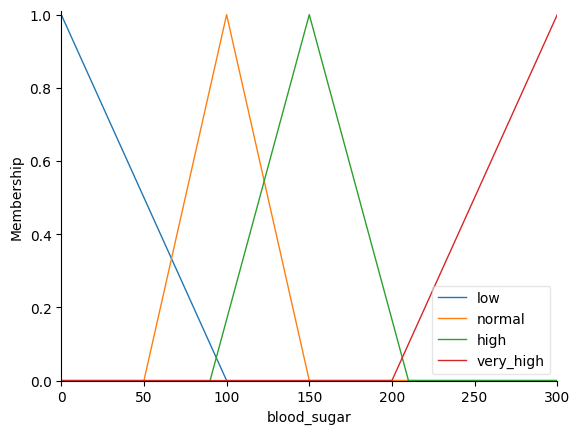

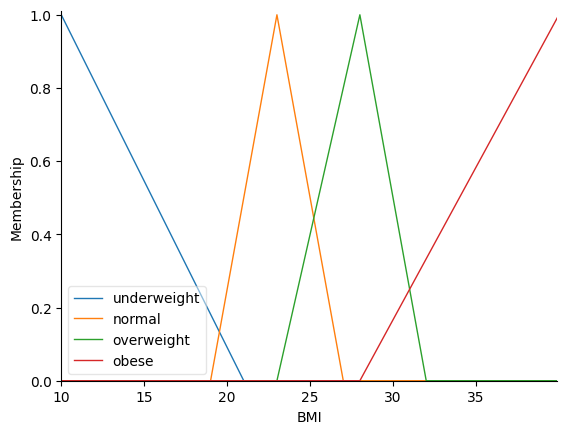

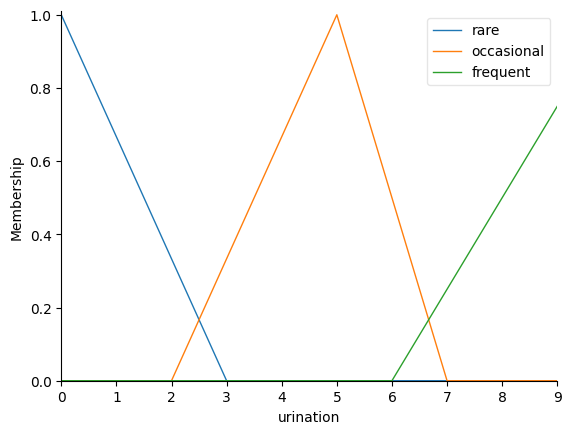

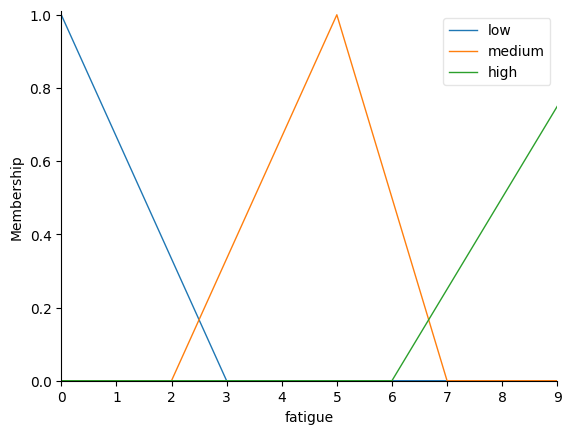

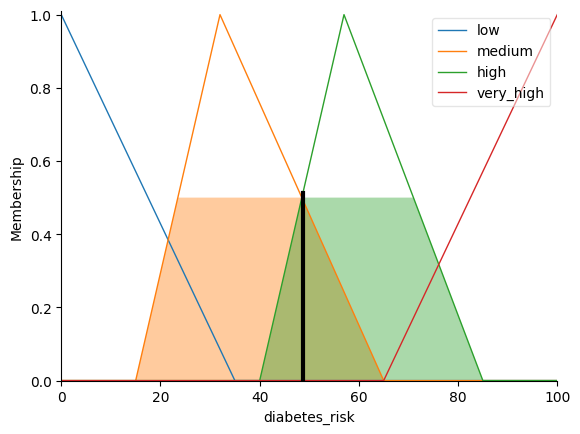

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

blood_sugar = ctrl.Antecedent(np.arange(0, 301, 1), 'blood_sugar')
BMI = ctrl.Antecedent(np.arange(10, 40, 0.1), 'BMI')
urination = ctrl.Antecedent(np.arange(0, 10, 1), 'urination')
fatigue = ctrl.Antecedent(np.arange(0, 10, 1), 'fatigue')

diabetes_risk = ctrl.Consequent(np.arange(0, 101, 1), 'diabetes_risk')

blood_sugar['low']= fuzz.trimf(blood_sugar.universe, [0, 0, 100])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [50, 100, 150])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [90, 150, 210])
blood_sugar['very_high'] = fuzz.trimf(blood_sugar.universe, [200, 300, 300])

BMI['underweight'] = fuzz.trimf(BMI.universe, [10,10,21])
BMI['normal'] = fuzz.trimf(BMI.universe, [19, 23, 27])
BMI['overweight'] = fuzz.trimf(BMI.universe, [23, 28, 32])
BMI['obese'] = fuzz.trimf(BMI.universe, [28, 40, 40])

urination['rare'] = fuzz.trimf(urination.universe, [0, 0, 3])
urination['occasional'] = fuzz.trimf(urination.universe, [2, 5, 7])
urination['frequent'] = fuzz.trimf(urination.universe, [6, 10, 10])

fatigue['low'] = fuzz.trimf(fatigue.universe, [0, 0, 3])
fatigue['medium'] = fuzz.trimf(fatigue.universe, [2, 5, 7])
fatigue['high'] = fuzz.trimf(fatigue.universe, [6, 10, 10])

diabetes_risk['low'] = fuzz.trimf(diabetes_risk.universe, [0, 0, 35])
diabetes_risk['medium'] = fuzz.trimf(diabetes_risk.universe, [15, 32, 65])
diabetes_risk['high'] = fuzz.trimf(diabetes_risk.universe, [40, 57, 85])
diabetes_risk['very_high'] = fuzz.trimf(diabetes_risk.universe, [65, 100, 100])

blood_sugar.view()
BMI.view()
urination.view()
fatigue.view()

rule1 = ctrl.Rule(blood_sugar['very_high'] & urination['frequent'], diabetes_risk['very_high'])
rule2 = ctrl.Rule(blood_sugar['very_high'] & urination['occasional'], diabetes_risk['high'])
rule3 = ctrl.Rule(blood_sugar['high'] & urination['frequent'], diabetes_risk['high'])
rule4 = ctrl.Rule(blood_sugar['normal'] & urination['rare'], diabetes_risk['low'])
rule5 = ctrl.Rule(blood_sugar['very_high'] &  BMI['obese'], diabetes_risk['very_high'])
rule6 = ctrl.Rule(blood_sugar['very_high'] & BMI['overweight'], diabetes_risk['high'])
rule7 = ctrl.Rule(blood_sugar['high'] & BMI['overweight'], diabetes_risk['high'])
rule8 = ctrl.Rule(blood_sugar['high'] & BMI['overweight'], diabetes_risk['medium'])
rule9 = ctrl.Rule(blood_sugar['normal'] & BMI['normal'], diabetes_risk['low'])
rule10 = ctrl.Rule(blood_sugar['very_high'] & fatigue['high'], diabetes_risk['very_high'])
rule11 = ctrl.Rule(blood_sugar['high'] & fatigue['high'], diabetes_risk['high'])
rule12 = ctrl.Rule(blood_sugar['high'] & fatigue['medium'], diabetes_risk['medium'])
rule13 = ctrl.Rule(blood_sugar['normal'] & fatigue['low'], diabetes_risk['low'])

vidu22_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
system_simulation = ctrl.ControlSystemSimulation(vidu22_ctrl)

system_simulation.input['blood_sugar'] = 180  #high
system_simulation.input['BMI'] = 28  # overweight
system_simulation.input['urination'] = 8  # frequent
system_simulation.input['fatigue'] = 4 #medium

system_simulation.compute()

print("Diabetes Risk:", system_simulation.output['diabetes_risk'])

diabetes_risk.view(sim=system_simulation)


In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.9 MB/s eta 0:00:00


Final Price: 80.2564102564102


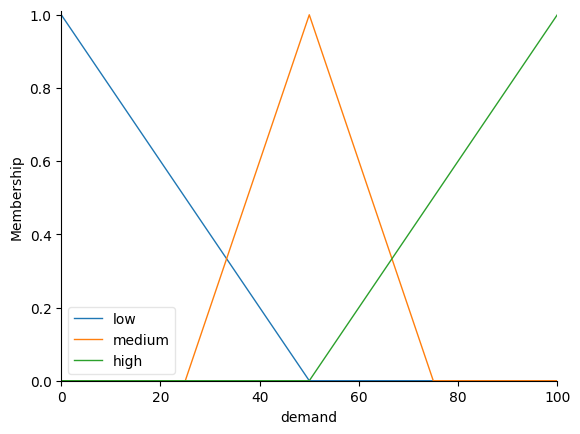

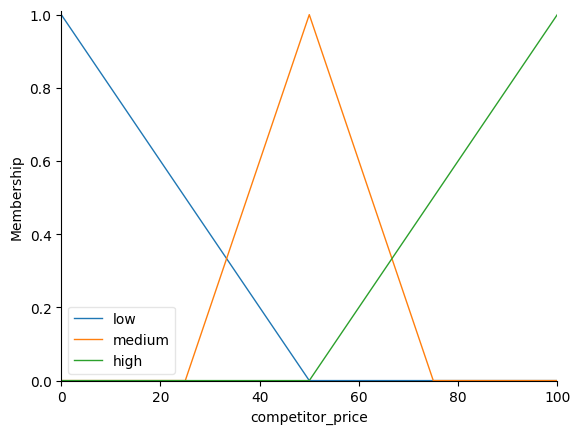

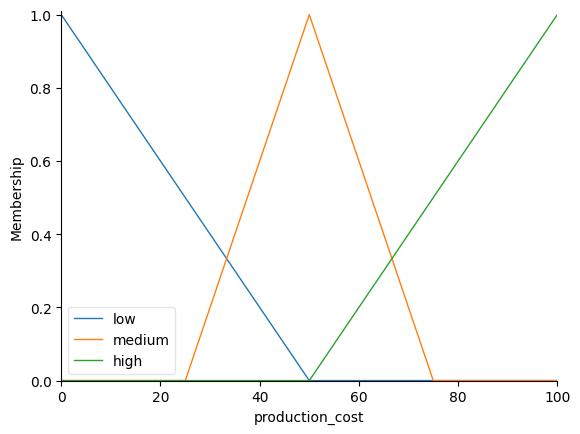

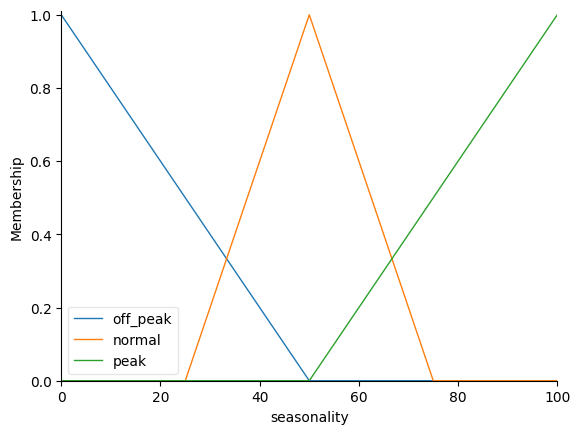

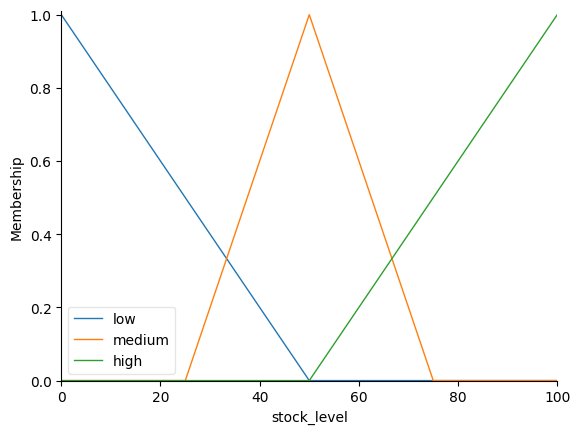

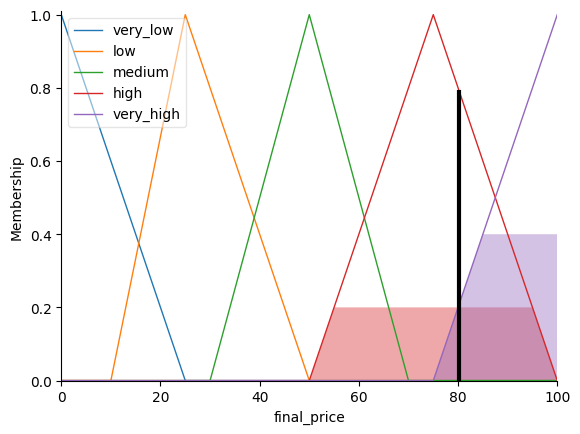

In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

demand = ctrl.Antecedent(np.arange(0, 101, 1), 'demand')
competitor_price = ctrl.Antecedent(np.arange(0, 101, 1), 'competitor_price')
production_cost = ctrl.Antecedent(np.arange(0, 101, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 101, 1), 'seasonality')
stock_level = ctrl.Antecedent(np.arange(0, 101, 1), 'stock_level')

final_price = ctrl.Consequent(np.arange(0, 101, 1), 'final_price')

demand['low'] = fuzz.trimf(demand.universe, [0, 0, 50])
demand['medium'] = fuzz.trimf(demand.universe, [25, 50, 75])
demand['high'] = fuzz.trimf(demand.universe, [50, 100, 100])

competitor_price['low'] = fuzz.trimf(competitor_price.universe, [0, 0, 50])
competitor_price['medium'] = fuzz.trimf(competitor_price.universe, [25, 50, 75])
competitor_price['high'] = fuzz.trimf(competitor_price.universe, [50, 100, 100])

production_cost['low'] = fuzz.trimf(production_cost.universe, [0, 0, 50])
production_cost['medium'] = fuzz.trimf(production_cost.universe, [25, 50, 75])
production_cost['high'] = fuzz.trimf(production_cost.universe, [50, 100, 100])

seasonality['off_peak'] = fuzz.trimf(seasonality.universe, [0, 0, 50])
seasonality['normal'] = fuzz.trimf(seasonality.universe, [25, 50, 75])
seasonality['peak'] = fuzz.trimf(seasonality.universe, [50, 100, 100])

stock_level['low'] = fuzz.trimf(stock_level.universe, [0, 0, 50])
stock_level['medium'] = fuzz.trimf(stock_level.universe, [25, 50, 75])
stock_level['high'] = fuzz.trimf(stock_level.universe, [50, 100, 100])

final_price['very_low'] = fuzz.trimf(final_price.universe, [0, 0, 25])
final_price['low'] = fuzz.trimf(final_price.universe, [10, 25, 50])
final_price['medium'] = fuzz.trimf(final_price.universe, [30, 50, 70])
final_price['high'] = fuzz.trimf(final_price.universe, [50, 75, 100])
final_price['very_high'] = fuzz.trimf(final_price.universe, [75, 100, 100])

demand.view()
competitor_price.view()
production_cost.view()
seasonality.view()
stock_level.view()

rule1 = ctrl.Rule(demand['high'] & competitor_price['high'] & stock_level['low'], final_price['very_high'])
rule2 = ctrl.Rule(demand['high'] & seasonality['peak'] & stock_level['low'], final_price['very_high'])
rule3 = ctrl.Rule(demand['medium'] & production_cost['high'] & stock_level['low'], final_price['very_high'])

rule4 = ctrl.Rule(demand['high'] & competitor_price['medium'] & stock_level['medium'], final_price['high'])
rule5 = ctrl.Rule(demand['medium'] & competitor_price['high'] & stock_level['low'], final_price['high'])
rule6 = ctrl.Rule(demand['medium'] & competitor_price['high'] & stock_level['low'], final_price['high'])
rule7 = ctrl.Rule(demand['high'] & seasonality['peak'] & stock_level['medium'], final_price['high'])

rule8 = ctrl.Rule(demand['medium'] & competitor_price['medium'] & stock_level['medium'], final_price['medium'])
rule9 = ctrl.Rule(demand['low'] & competitor_price['high'] & stock_level['medium'], final_price['medium'])
rule10 = ctrl.Rule(demand['medium'] & production_cost['medium'] & stock_level['medium'], final_price['medium'])

rule11 = ctrl.Rule(demand['low'] & competitor_price['low'] & stock_level['high'], final_price['low'])
rule12 = ctrl.Rule(demand['medium'] & production_cost['low'] & stock_level['high'], final_price['low'])
rule13 = ctrl.Rule(demand['low'] & seasonality['off_peak'] & stock_level['high'], final_price['low'])

rule14 = ctrl.Rule(demand['low'] & competitor_price['low'] & stock_level['high'], final_price['very_low'])
rule15 = ctrl.Rule(demand['low'] & seasonality['off_peak'] & stock_level['high'], final_price['very_low'])
rule16 = ctrl.Rule(demand['medium'] & competitor_price['low'] & stock_level['high'], final_price['very_low'])
rule17 = ctrl.Rule(demand['medium'] & competitor_price['low'] & stock_level['high'], final_price['very_low'])

vidu23_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17])
vidu23_simulation = ctrl.ControlSystemSimulation(vidu23_system)
vidu23_simulation.input['demand'] = 80
vidu23_simulation.input['competitor_price'] = 60
vidu23_simulation.input['production_cost'] = 50
vidu23_simulation.input['seasonality'] = 90
vidu23_simulation.input['stock_level'] = 30
vidu23_simulation.compute()
print("Final Price:", vidu23_simulation.output['final_price'])
final_price.view(sim=vidu23_simulation)



Wash time: 64.54248366013077
Water level: 62.06029790510579


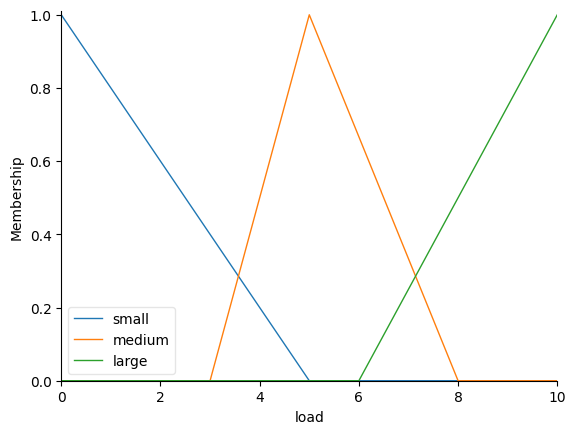

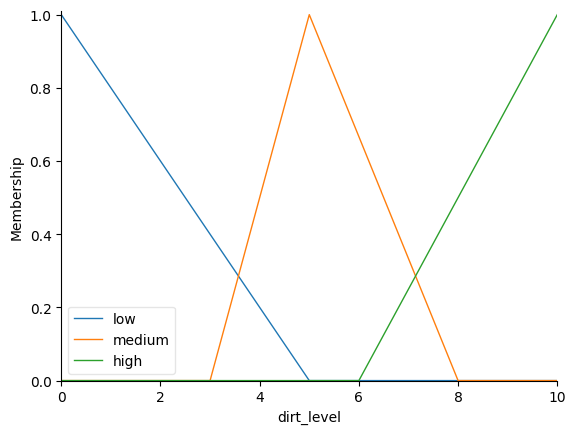

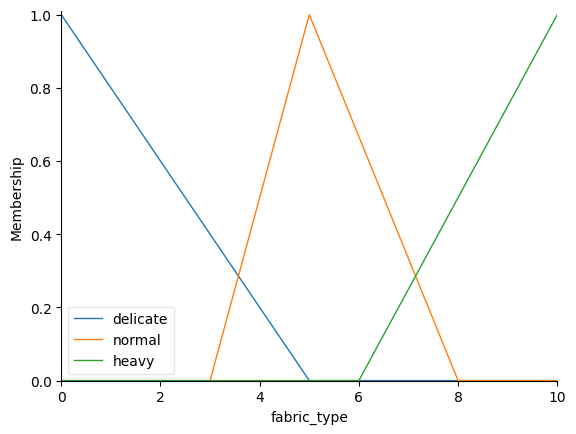

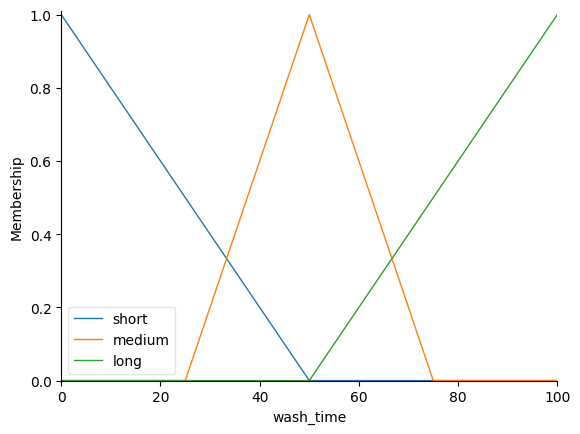

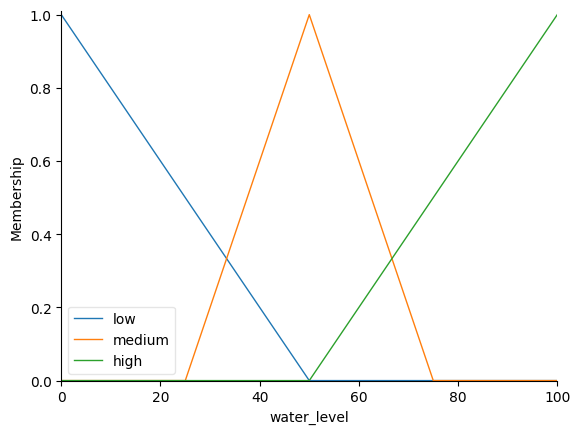

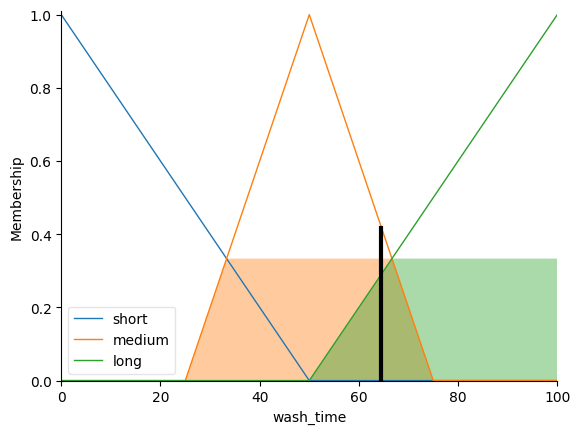

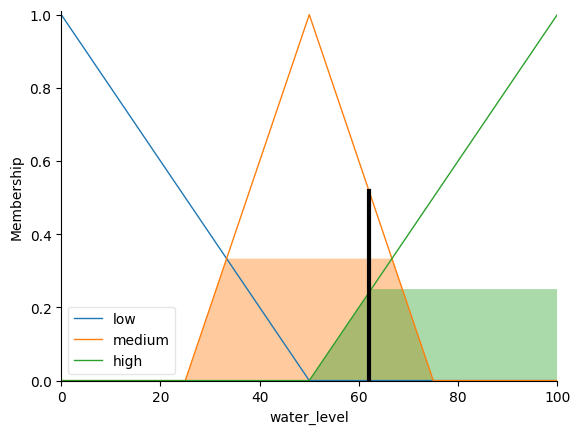

In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

load = ctrl.Antecedent(np.arange(0, 11, 1), 'load')
dirt_level = ctrl.Antecedent(np.arange(0, 11, 1), 'dirt_level')
fabric_type = ctrl.Antecedent(np.arange(0, 11, 1), 'fabric_type')

wash_time = ctrl.Consequent(np.arange(0, 101, 1), 'wash_time')
water_level = ctrl.Consequent(np.arange(0, 101, 1), 'water_level')

load['small'] = fuzz.trimf(load.universe, [0, 0, 5])
load['medium'] = fuzz.trimf(load.universe, [3, 5, 8])
load['large'] = fuzz.trimf(load.universe, [6, 10, 10])

dirt_level['low'] = fuzz.trimf(dirt_level.universe, [0, 0, 5])
dirt_level['medium'] = fuzz.trimf(dirt_level.universe, [3, 5, 8])
dirt_level['high'] = fuzz.trimf(dirt_level.universe, [6, 10, 10])

fabric_type['delicate'] = fuzz.trimf(fabric_type.universe, [0, 0, 5])
fabric_type['normal'] = fuzz.trimf(fabric_type.universe, [3, 5, 8])
fabric_type['heavy'] = fuzz.trimf(fabric_type.universe, [6, 10, 10])

wash_time['short'] = fuzz.trimf(wash_time.universe, [0, 0, 50])
wash_time['medium'] = fuzz.trimf(wash_time.universe, [25, 50, 75])
wash_time['long'] = fuzz.trimf(wash_time.universe, [50, 100, 100])

water_level['low'] = fuzz.trimf(water_level.universe, [0, 0, 50])
water_level['medium'] = fuzz.trimf(water_level.universe, [25, 50, 75])
water_level['high'] = fuzz.trimf(water_level.universe, [50, 100, 100])

load.view()
dirt_level.view()
fabric_type.view()
wash_time.view()
water_level.view()

rule1 = ctrl.Rule(load['small'] & dirt_level['low'], (wash_time['short'], water_level['low']))
rule2 = ctrl.Rule(load['small'] & dirt_level['medium'], (wash_time['medium'], water_level['medium']))
rule3 = ctrl.Rule(load['small'] & dirt_level['high'], (wash_time['long'], water_level['medium']))
rule4 = ctrl.Rule(load['medium'] & dirt_level['low'], (wash_time['medium'], water_level['medium']))
rule5 = ctrl.Rule(load['medium'] & dirt_level['medium'], (wash_time['long'], water_level['medium']))
rule6 = ctrl.Rule(load['medium'] & dirt_level['high'], (wash_time['long'], water_level['high']))
rule7 = ctrl.Rule(load['large'] & dirt_level['low'], (wash_time['medium'], water_level['high']))
rule8 = ctrl.Rule(load['large'] & dirt_level['low'], (wash_time['long'], water_level['high']))
rule9 = ctrl.Rule(load['large'] & dirt_level['medium'], (wash_time['long'], water_level['high']))
rule10 = ctrl.Rule(load['large'] & dirt_level['medium'], (wash_time['long'], water_level['high']))
rule11 = ctrl.Rule(load['large'] & dirt_level['high'], (wash_time['long'], water_level['high']))

rule12 = ctrl.Rule(fabric_type['delicate'], (wash_time['short'], water_level['low']))
rule13 = ctrl.Rule(fabric_type['normal'], (wash_time['medium'], water_level['medium']))
rule14 = ctrl.Rule(fabric_type['heavy'], (wash_time['long'], water_level['high']))

rule15 = ctrl.Rule(load['large'] & dirt_level['high'] & fabric_type['heavy'], (wash_time['long'], water_level['high']))
rule16 = ctrl.Rule(load['small'] & dirt_level['low'] & fabric_type['delicate'], (wash_time['short'], water_level['low']))
rule17 = ctrl.Rule(load['medium'] & dirt_level['medium'] & fabric_type['normal'], (wash_time['medium'], water_level['medium']))

vidu24_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17])
vidu24_simulation = ctrl.ControlSystemSimulation(vidu24_system)
vidu24_simulation.input['load'] = 7
vidu24_simulation.input['dirt_level'] = 4
vidu24_simulation.input['fabric_type'] = 7
vidu24_simulation.compute()
print("Wash time:", vidu24_simulation.output['wash_time'])
print("Water level:", vidu24_simulation.output['water_level'])
wash_time.view(sim=vidu24_simulation)
water_level.view(sim=vidu24_simulation)

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.6 MB/s eta 0:00:00


Fan speed: 82.17948717948723
Cooling level: 47.80922431865828


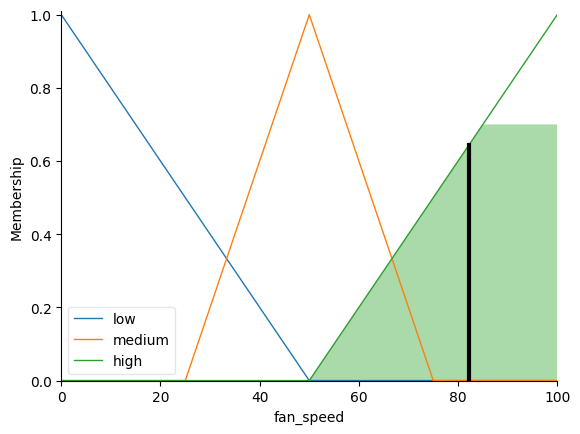

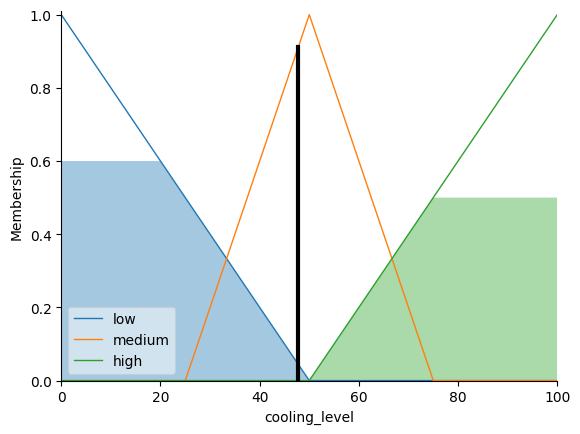

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
people = ctrl.Antecedent(np.arange(0, 21, 1), 'people')

fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')
cooling_level = ctrl.Consequent(np.arange(0, 101, 1), 'cooling_level')

temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 30])
temperature['cool'] = fuzz.trimf(temperature.universe, [10, 30, 50])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [30, 50, 70])
temperature['warm'] = fuzz.trimf(temperature.universe, [50, 70, 90])
temperature['hot'] = fuzz.trimf(temperature.universe, [70, 100, 100])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [25, 50, 75])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

people['few'] = fuzz.trimf(people.universe, [0, 0, 5])
people['moderate'] = fuzz.trimf(people.universe, [3, 10, 15])
people['many'] = fuzz.trimf(people.universe, [10, 20, 20])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

cooling_level['low'] = fuzz.trimf(cooling_level.universe, [0, 0, 50])
cooling_level['medium'] = fuzz.trimf(cooling_level.universe, [25, 50, 75])
cooling_level['high'] = fuzz.trimf(cooling_level.universe, [50, 100, 100])

rule1 = ctrl.Rule(temperature['cold'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['cool'], fan_speed['low'])
rule3 = ctrl.Rule(temperature['comfortable'], fan_speed['medium'])
rule4 = ctrl.Rule(temperature['warm'], fan_speed['high'])
rule5 = ctrl.Rule(temperature['hot'], fan_speed['high'])

rule6 = ctrl.Rule(temperature['cold'], cooling_level['low'])
rule7 = ctrl.Rule(temperature['cool'], cooling_level['low'])
rule8 = ctrl.Rule(temperature['comfortable'], cooling_level['medium'])
rule9 = ctrl.Rule(temperature['warm'], cooling_level['high'])
rule10 = ctrl.Rule(temperature['hot'], cooling_level['high'])

rule11 = ctrl.Rule(humidity['low'], cooling_level['low'])
rule12 = ctrl.Rule(humidity['medium'], cooling_level['medium'])
rule13 = ctrl.Rule(humidity['high'], cooling_level['high'])

rule14 = ctrl.Rule(people['few'], fan_speed['low'])
rule15 = ctrl.Rule(people['moderate'], fan_speed['medium'])
rule16 = ctrl.Rule(people['many'], fan_speed['high'])

rule17 = ctrl.Rule(temperature['hot'] & humidity['high'] & people['many'], (cooling_level['high'], fan_speed['high']))
rule18 = ctrl.Rule(temperature['comfortable'] & humidity['medium'] & people['moderate'], (cooling_level['medium'], fan_speed['medium']))
rule19 = ctrl.Rule(temperature['cool'] & humidity['low'] & people['few'], (cooling_level['low'], fan_speed['low']))

vidu25_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19])
vidu25_system = ctrl.ControlSystemSimulation(vidu25_ctrl)
vidu25_system.input['temperature'] = 80
vidu25_system.input['humidity'] = 20
vidu25_system.input['people'] = 17
vidu25_system.compute()
print("Fan speed:", vidu25_system.output['fan_speed'])
print("Cooling level:", vidu25_system.output['cooling_level'])

fan_speed.view(sim=vidu25_system)
cooling_level.view(sim=vidu25_system)


In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.6 MB/s eta 0:00:00


Cooking time: 38.219875747053116
Power level: 53.43865363735073


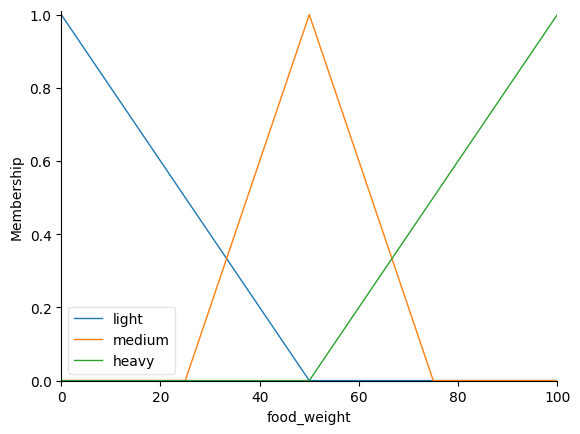

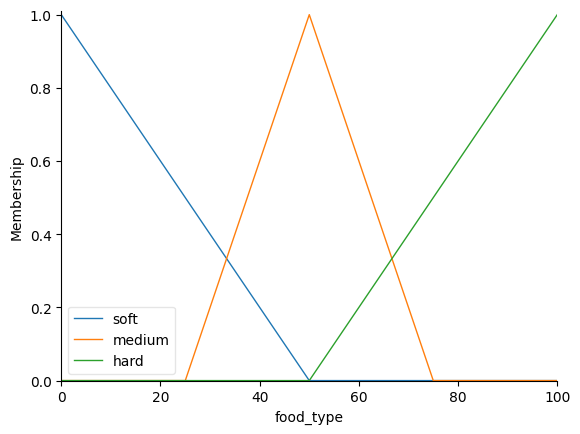

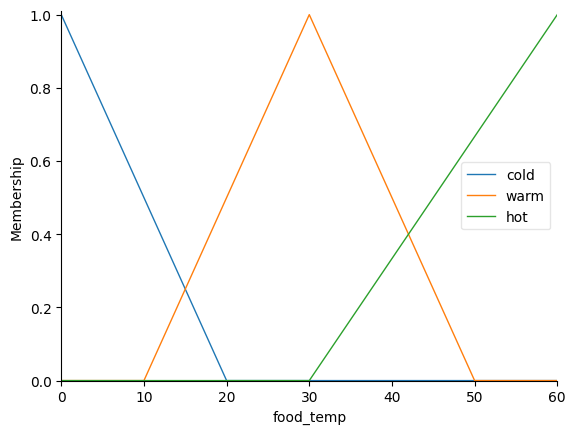

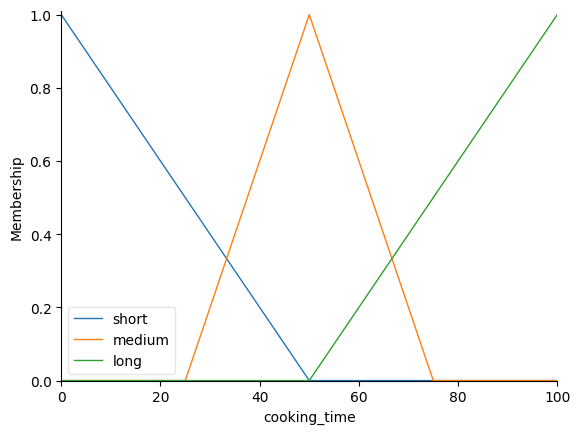

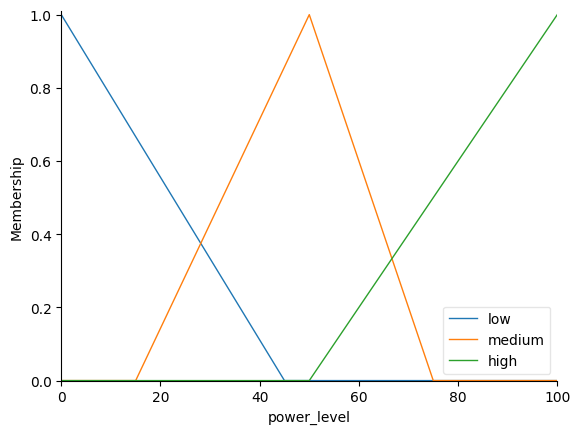

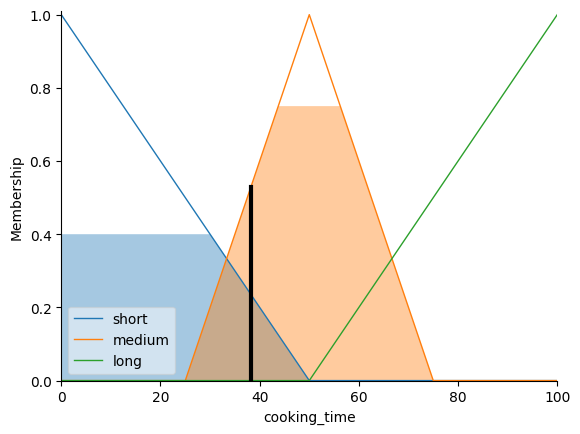

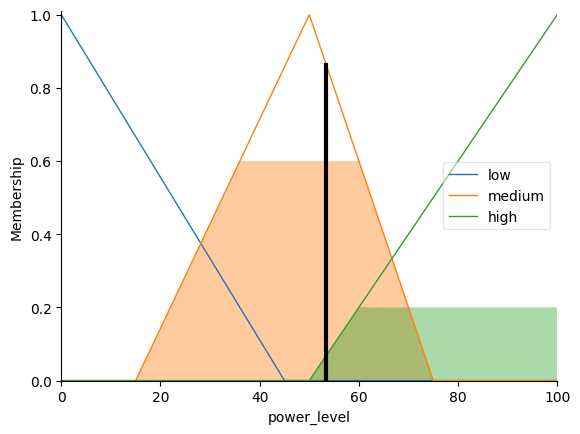

In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

food_weight = ctrl.Antecedent(np.arange(0, 101, 1), 'food_weight')
food_type = ctrl.Antecedent(np.arange(0, 101, 1), 'food_type')
food_temp = ctrl.Antecedent(np.arange(0, 61, 1), 'food_temp')

cooking_time = ctrl.Consequent(np.arange(0, 101, 1), 'cooking_time')
power_level = ctrl.Consequent(np.arange(0, 101, 1), 'power_level')


food_weight['light'] = fuzz.trimf(food_weight.universe, [0, 0, 50])
food_weight['medium'] = fuzz.trimf(food_weight.universe, [25, 50, 75])
food_weight['heavy'] = fuzz.trimf(food_weight.universe, [50, 100, 100])

food_type['soft'] = fuzz.trimf(food_type.universe, [0, 0, 50])
food_type['medium'] = fuzz.trimf(food_type.universe, [25, 50, 75])
food_type['hard'] = fuzz.trimf(food_type.universe, [50, 100, 100])

food_temp['cold'] = fuzz.trimf(food_temp.universe, [0, 0, 20])
food_temp['warm'] = fuzz.trimf(food_temp.universe, [10, 30, 50])
food_temp['hot'] = fuzz.trimf(food_temp.universe, [30, 60, 60])

cooking_time['short'] = fuzz.trimf(cooking_time.universe, [0, 0, 50])
cooking_time['medium'] = fuzz.trimf(cooking_time.universe, [25, 50, 75])
cooking_time['long'] = fuzz.trimf(cooking_time.universe, [50, 100, 100])

power_level['low'] = fuzz.trimf(power_level.universe, [0, 0, 45])
power_level['medium'] = fuzz.trimf(power_level.universe, [15, 50, 75])
power_level['high'] = fuzz.trimf(power_level.universe, [50, 100, 100])

food_weight.view()
food_type.view()
food_temp.view()
cooking_time.view()
power_level.view()

rule1 = ctrl.Rule(food_weight['light'], cooking_time['short'])
rule2 = ctrl.Rule(food_weight['medium'], cooking_time['medium'])
rule3 = ctrl.Rule(food_weight['heavy'], cooking_time['long'])

rule4 = ctrl.Rule(food_type['soft'], power_level['low'])
rule5 = ctrl.Rule(food_type['medium'], power_level['medium'])
rule6 = ctrl.Rule(food_type['hard'], power_level['high'])

rule7 = ctrl.Rule(food_temp['cold'], cooking_time['long'])
rule8 = ctrl.Rule(food_temp['warm'], cooking_time['medium'])
rule9 = ctrl.Rule(food_temp['hot'], cooking_time['short'])

rule10 = ctrl.Rule(food_weight['heavy'] & food_type['hard'] & food_temp['cold'], (cooking_time['long'], power_level['high']))
rule11 = ctrl.Rule(food_weight['medium'] & food_type['soft'] & food_temp['warm'], (cooking_time['medium'], power_level['low']))
rule12 = ctrl.Rule(food_weight['light'] & food_type['medium'] & food_temp['hot'], (cooking_time['short'], power_level['medium']))

vidu26_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
cooking_system = ctrl.ControlSystemSimulation(vidu26_ctrl)
cooking_system.input['food_weight'] = 30
cooking_system.input['food_type'] = 60
cooking_system.input['food_temp'] = 25
cooking_system.compute()
print("Cooking time:", cooking_system.output['cooking_time'])
print("Power level:", cooking_system.output['power_level'])

cooking_time.view(sim=cooking_system)
power_level.view(sim=cooking_system)

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.8 MB/s eta 0:00:00


Cooking time:  47.749999999999986
Heat Level:  68.87442026400292


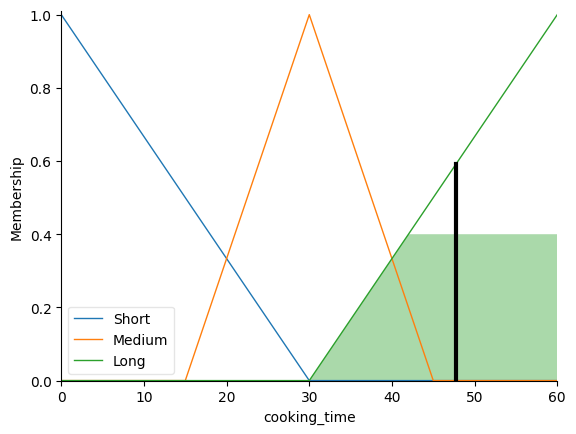

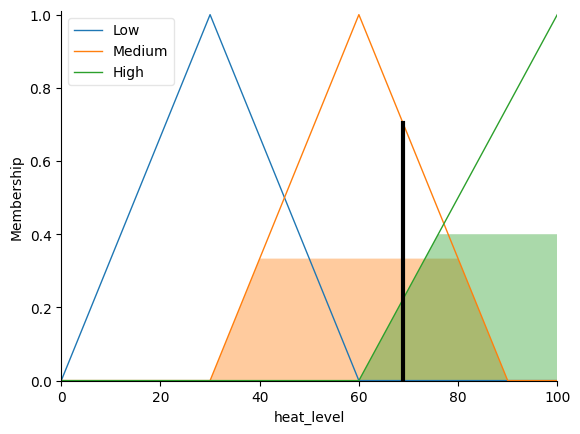

In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Khai báo các biến đầu vào
food_type = ctrl.Antecedent(np.arange(0, 11, 1), 'food_type')
food_weight = ctrl.Antecedent(np.arange(0, 71, 1), 'food_weight')
initial_temp = ctrl.Antecedent(np.arange(0, 11, 1), 'initial_temp')
water_content = ctrl.Antecedent(np.arange(0, 11, 1), 'water_content')

# Khai báo các biến đầu ra
cooking_time = ctrl.Consequent(np.arange(0, 61, 1), 'cooking_time')
heat_level = ctrl.Consequent(np.arange(0, 101, 1), 'heat_level')

# Định nghĩa các bộ mờ
food_type['Soft'] = fuzz.trimf(food_type.universe, [0, 0, 5])
food_type['Medium'] = fuzz.trimf(food_type.universe, [2, 5, 8])
food_type['Hard'] = fuzz.trimf(food_type.universe, [5, 10, 10])

food_weight['Light'] = fuzz.trimf(food_weight.universe, [0, 0, 20])
food_weight['Medium'] = fuzz.trimf(food_weight.universe, [5, 25, 45])
food_weight['Heavy'] = fuzz.trimf(food_weight.universe, [30, 70, 70])

initial_temp['Cold'] = fuzz.trimf(initial_temp.universe, [0, 0, 5])
initial_temp['Warm'] = fuzz.trimf(initial_temp.universe, [2, 5, 8])
initial_temp['Hot'] = fuzz.trimf(initial_temp.universe, [5, 10, 10])

water_content['Low'] = fuzz.trimf(water_content.universe, [0, 0, 5])
water_content['Medium'] = fuzz.trimf(water_content.universe, [2, 5, 8])
water_content['High'] = fuzz.trimf(water_content.universe, [5, 10, 10])

cooking_time['Short'] = fuzz.trimf(cooking_time.universe, [0, 0, 30])
cooking_time['Medium'] = fuzz.trimf(cooking_time.universe, [15, 30, 45])
cooking_time['Long'] = fuzz.trimf(cooking_time.universe, [30, 60, 60])

heat_level['Low'] = fuzz.trimf(heat_level.universe, [0, 30, 60])
heat_level['Medium'] = fuzz.trimf(heat_level.universe, [30, 60, 90])
heat_level['High'] = fuzz.trimf(heat_level.universe, [60, 100, 100])

rule1 = ctrl.Rule(food_type['Hard'] & food_weight['Heavy'], cooking_time['Long'])
rule2 = ctrl.Rule(food_type['Medium'] & food_weight['Medium'], cooking_time['Medium'])
rule3 = ctrl.Rule(food_type['Soft'] & food_weight['Light'], cooking_time['Short'])
rule4 = ctrl.Rule(initial_temp['Hot'], cooking_time['Short'])
rule5 = ctrl.Rule(initial_temp['Cold'], cooking_time['Long'])

rule6 = ctrl.Rule(water_content['High'], heat_level['High'])
rule7 = ctrl.Rule(food_type['Soft'], heat_level['Low'])
rule8 = ctrl.Rule(food_type['Medium'], heat_level['Medium'])
rule9 = ctrl.Rule(food_type['Hard'] & food_weight['Heavy'], heat_level['High'])
rule10 = ctrl.Rule(initial_temp['Cold'] & water_content['Low'], heat_level['High'])

vidu27_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
vidu27_simulation=ctrl.ControlSystemSimulation(vidu27_ctrl)
vidu27_simulation.input['food_type'] = 7
vidu27_simulation.input['food_weight'] = 67
vidu27_simulation.input['initial_temp'] = 3
vidu27_simulation.input['water_content'] = 6

vidu27_simulation.compute()

print("Cooking time: ", vidu27_simulation.output['cooking_time'])
print("Heat Level: ", vidu27_simulation.output['heat_level'])

cooking_time.view(sim=vidu27_simulation)
heat_level.view(sim=vidu27_simulation)

Liều thuốc dùng 6.62759643916914
Điều chỉnh  dịch truyền tĩnh mạch 8.0
Liệu pháp oxy 8.0


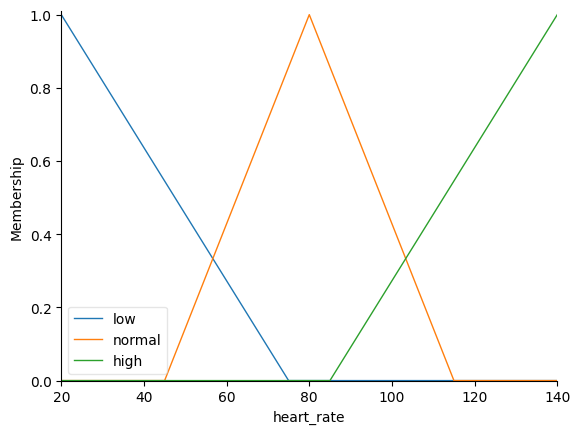

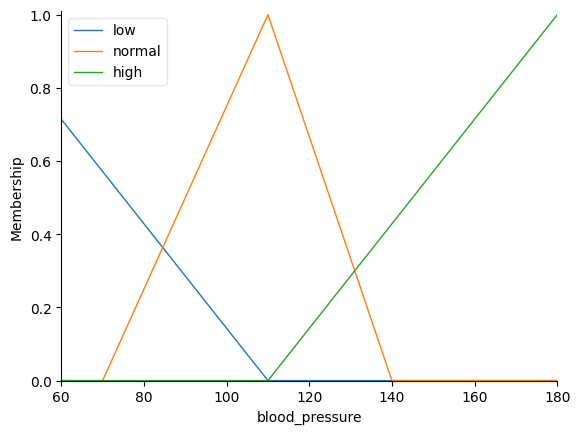

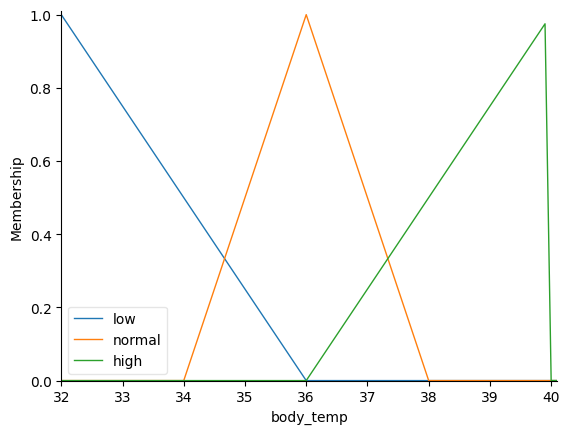

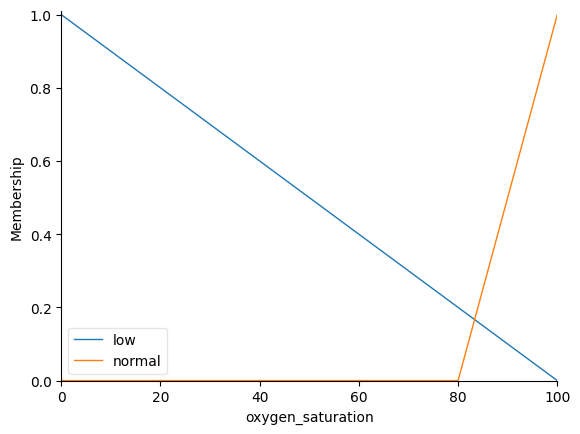

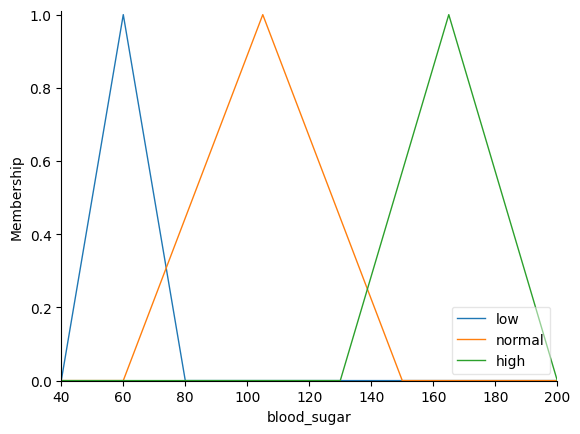

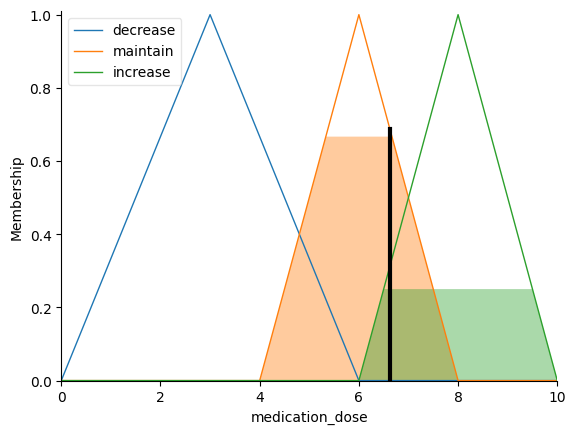

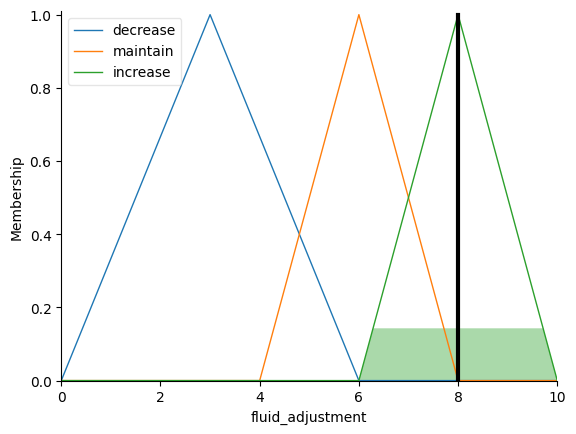

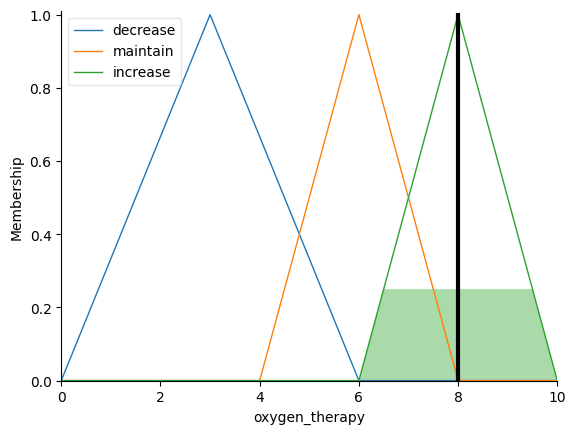

In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

heart_rate = ctrl.Antecedent(np.arange(20, 141, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(60, 181, 1), 'blood_pressure')
body_temp = ctrl.Antecedent(np.arange(32, 40.1, 0.1), 'body_temp')
oxygen_saturation = ctrl.Antecedent(np.arange(0, 101, 1), 'oxygen_saturation')
blood_sugar = ctrl.Antecedent(np.arange(40, 201, 1), 'blood_sugar')

medication_dose = ctrl.Consequent(np.arange(0, 11, 1), 'medication_dose')
fluid_adjustment = ctrl.Consequent(np.arange(0, 11, 1), 'fluid_adjustment')
oxygen_therapy = ctrl.Consequent(np.arange(0, 11, 1), 'oxygen_therapy')

heart_rate['low'] = fuzz.trimf(heart_rate.universe, [20, 20, 75])
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [45, 80, 115])
heart_rate['high'] = fuzz.trimf(heart_rate.universe, [85, 140, 140])

blood_pressure['low'] = fuzz.trimf(blood_pressure.universe, [40, 40, 110])
blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [70, 110, 140])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [110, 180, 180])

body_temp['low'] = fuzz.trimf(body_temp.universe, [32, 32, 36])
body_temp['normal'] = fuzz.trimf(body_temp.universe, [34, 36, 38])
body_temp['high'] = fuzz.trimf(body_temp.universe, [36, 40, 40])

oxygen_saturation['low'] = fuzz.trimf(oxygen_saturation.universe, [0, 0,100])
oxygen_saturation['normal'] = fuzz.trimf(oxygen_saturation.universe, [80, 100, 100])

blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [40, 60, 80])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [60, 105, 150])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [130, 165, 200])

medication_dose['decrease'] = fuzz.trimf(medication_dose.universe, [0, 3, 6])
medication_dose['maintain'] = fuzz.trimf(medication_dose.universe, [4, 6, 8])
medication_dose['increase'] = fuzz.trimf(medication_dose.universe, [6, 8, 10])

fluid_adjustment['decrease'] = fuzz.trimf(fluid_adjustment.universe, [0, 3, 6])
fluid_adjustment['maintain'] = fuzz.trimf(fluid_adjustment.universe, [4, 6, 8])
fluid_adjustment['increase'] = fuzz.trimf(fluid_adjustment.universe, [6, 8, 10])

oxygen_therapy['decrease'] = fuzz.trimf(oxygen_therapy.universe, [0, 3, 6])
oxygen_therapy['maintain'] = fuzz.trimf(oxygen_therapy.universe, [4, 6, 8])
oxygen_therapy['increase'] = fuzz.trimf(oxygen_therapy.universe, [6, 8, 10])

heart_rate.view()
blood_pressure.view()
body_temp.view()
oxygen_saturation.view()
blood_sugar.view()

rule1 = ctrl.Rule(heart_rate['low'] & blood_pressure['low'], (fluid_adjustment['increase'], medication_dose['increase']))
rule2 = ctrl.Rule(heart_rate['high'] & blood_pressure['high'], medication_dose['decrease'])
rule3 = ctrl.Rule(heart_rate['normal'] & blood_pressure['normal'], medication_dose['maintain'])
rule4 = ctrl.Rule(body_temp['high'] & oxygen_saturation['low'], (oxygen_therapy['increase'], medication_dose['increase']))
rule5 = ctrl.Rule(body_temp['normal'] & oxygen_saturation['normal'], medication_dose['maintain'])
rule6 = ctrl.Rule(body_temp['low'] & oxygen_saturation['low'], (oxygen_therapy['increase'], fluid_adjustment['increase']))
rule7 = ctrl.Rule(blood_sugar['high'], medication_dose['increase'])
rule8 = ctrl.Rule(blood_sugar['low'], medication_dose['decrease'])
rule9 = ctrl.Rule(blood_sugar['normal'], medication_dose['maintain'])
rule10 = ctrl.Rule(blood_pressure['high'] & blood_sugar['high'] & heart_rate['high'], medication_dose['decrease'])
rule11 = ctrl.Rule(blood_pressure['low'] & oxygen_saturation['low'] & heart_rate['low'], (fluid_adjustment['increase'], oxygen_therapy['increase'], medication_dose['increase']))
rule12 = ctrl.Rule(body_temp['high'] & blood_pressure['high'] & oxygen_saturation['normal'], (medication_dose['increase'], oxygen_therapy['maintain']))

vidu28_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
vidu28_simulation = ctrl.ControlSystemSimulation(vidu28_system)
vidu28_simulation.input['heart_rate']= 60
vidu28_simulation.input['blood_pressure']= 100
vidu28_simulation.input['body_temp']=37
vidu28_simulation.input['oxygen_saturation']=70
vidu28_simulation.input['blood_sugar']=120
vidu28_simulation.compute()
print("Liều thuốc dùng", vidu28_simulation.output['medication_dose'])
print("Điều chỉnh  dịch truyền tĩnh mạch", vidu28_simulation.output['fluid_adjustment'])
print("Liệu pháp oxy", vidu28_simulation.output['oxygen_therapy'])
medication_dose.view(sim=vidu28_simulation)
fluid_adjustment.view(sim=vidu28_simulation)
oxygen_therapy.view(sim=vidu28_simulation)

Review sentiment 4.972677595628415


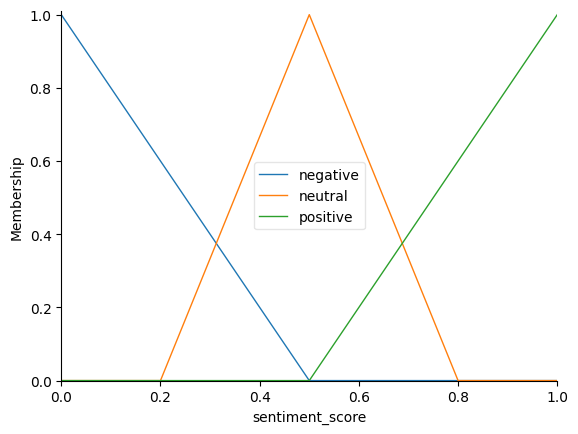

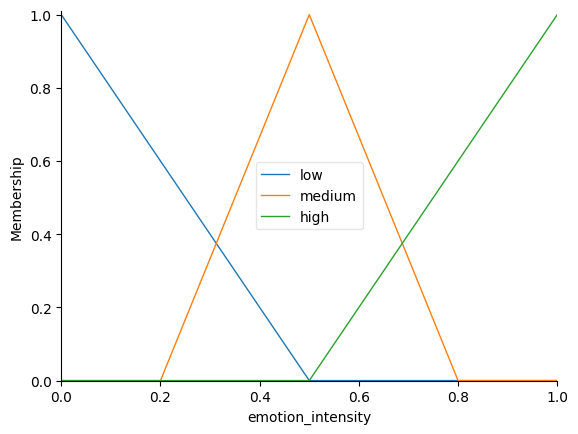

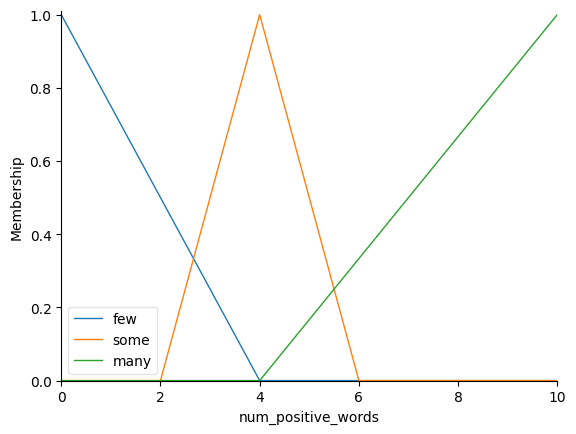

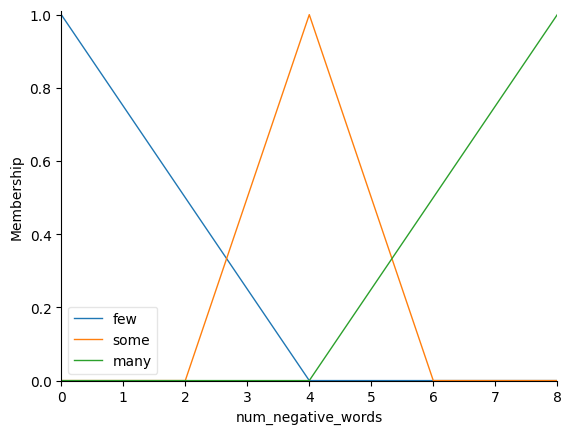

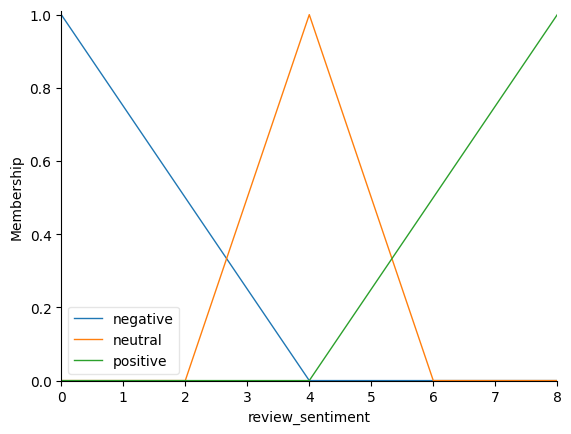

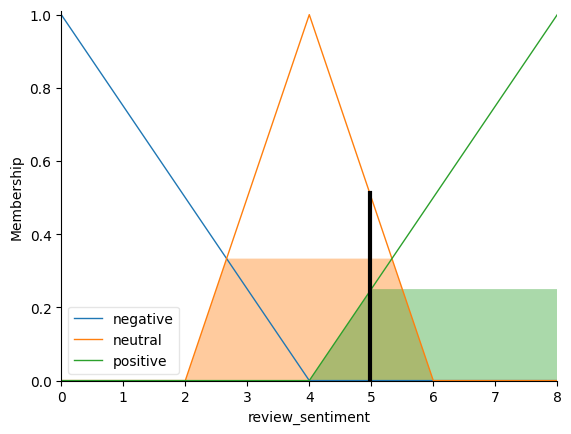

In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'sentiment_score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'emotion_intensity')
num_positive_words = ctrl.Antecedent(np.arange(0, 11, 1), 'num_positive_words')
num_negative_words = ctrl.Antecedent(np.arange(0, 9, 1), 'num_negative_words')

review_sentiment = ctrl.Consequent(np.arange(0, 9, 1), 'review_sentiment')

sentiment_score['negative'] = fuzz.trimf(sentiment_score.universe, [0, 0, 0.5])
sentiment_score['neutral'] = fuzz.trimf(sentiment_score.universe, [0.2, 0.5, 0.8])
sentiment_score['positive'] = fuzz.trimf(sentiment_score.universe, [0.5, 1, 1])

emotion_intensity['low'] = fuzz.trimf(emotion_intensity.universe, [0, 0, 0.5])
emotion_intensity['medium'] = fuzz.trimf(emotion_intensity.universe, [0.2, 0.5, 0.8])
emotion_intensity['high'] = fuzz.trimf(emotion_intensity.universe, [0.5, 1, 1])

num_positive_words['few'] = fuzz.trimf(num_positive_words.universe, [0, 0, 4])
num_positive_words['some'] = fuzz.trimf(num_positive_words.universe, [2, 4, 6])
num_positive_words['many'] = fuzz.trimf(num_positive_words.universe, [4, 10, 10])

num_negative_words['few'] = fuzz.trimf(num_negative_words.universe, [0, 0, 4])
num_negative_words['some'] = fuzz.trimf(num_negative_words.universe, [2, 4, 6])
num_negative_words['many'] = fuzz.trimf(num_negative_words.universe, [4, 8, 8])

review_sentiment['negative'] = fuzz.trimf(review_sentiment.universe, [0, 0, 4])
review_sentiment['neutral'] = fuzz.trimf(review_sentiment.universe, [2, 4, 6])
review_sentiment['positive'] = fuzz.trimf(review_sentiment.universe, [4, 8, 8])

sentiment_score.view()
emotion_intensity.view()
num_positive_words.view()
num_negative_words.view()
review_sentiment.view()

rule1 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['high'], review_sentiment['negative'])
rule2 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['low'], review_sentiment['neutral'])
rule3 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'], review_sentiment['neutral'])
rule4 = ctrl.Rule(sentiment_score['positive'] & emotion_intensity['high'], review_sentiment['positive'])

rule5 = ctrl.Rule(num_positive_words['many'] & num_negative_words['few'], review_sentiment['positive'])
rule6 = ctrl.Rule(num_positive_words['few'] & num_negative_words['many'], review_sentiment['negative'])
rule7 = ctrl.Rule(num_positive_words['some'] & num_negative_words['some'], review_sentiment['neutral'])

rule8 = ctrl.Rule(sentiment_score['negative'] & num_negative_words['many'] & emotion_intensity['high'], review_sentiment['negative'])
rule9 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'] & num_positive_words['some'], review_sentiment['neutral'])
rule10 = ctrl.Rule(sentiment_score['positive'] & num_positive_words['many'] & emotion_intensity['high'], review_sentiment['positive'])

vidu29_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
vidu29_simulation = ctrl.ControlSystemSimulation(vidu29_ctrl)
vidu29_simulation.input['sentiment_score']=0.6
vidu29_simulation.input['emotion_intensity']=0.3
vidu29_simulation.input['num_positive_words']=7
vidu29_simulation.input['num_negative_words']=3
vidu29_simulation.compute()
print("Review sentiment", vidu29_simulation.output['review_sentiment'])
review_sentiment.view(sim=vidu29_simulation)

Delivery time:  20.623775189498996
Delivery time:  0.4321212121212122
Delivery time:  3.341666666666667


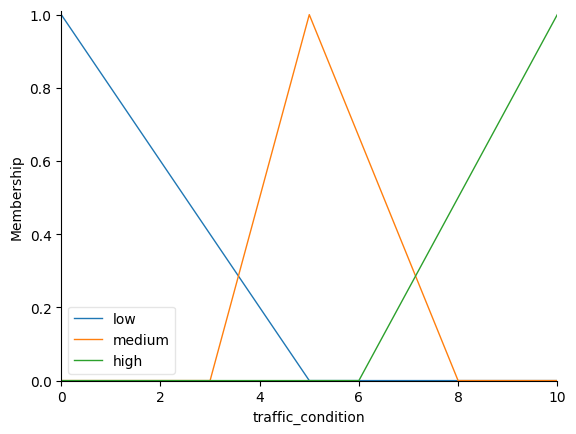

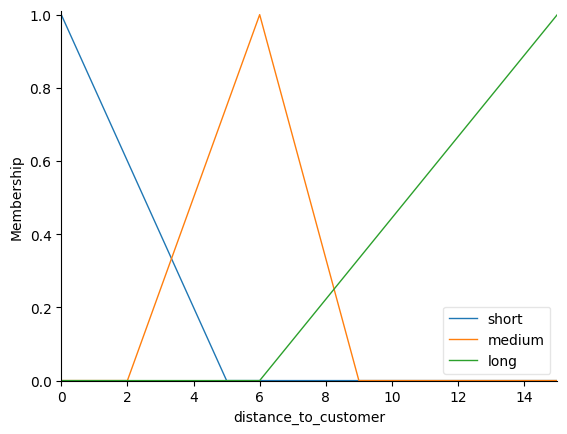

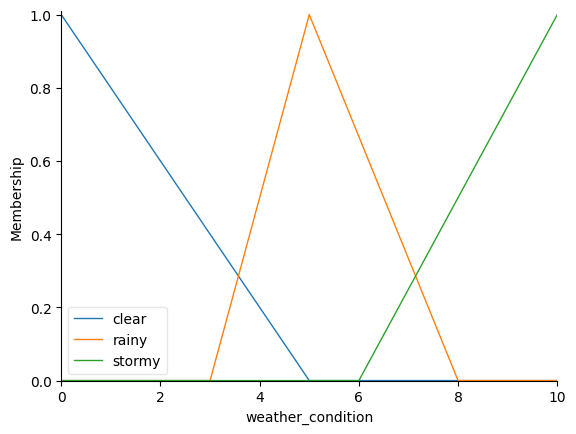

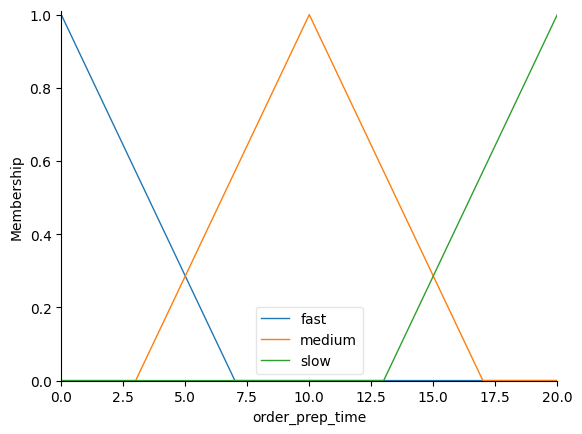

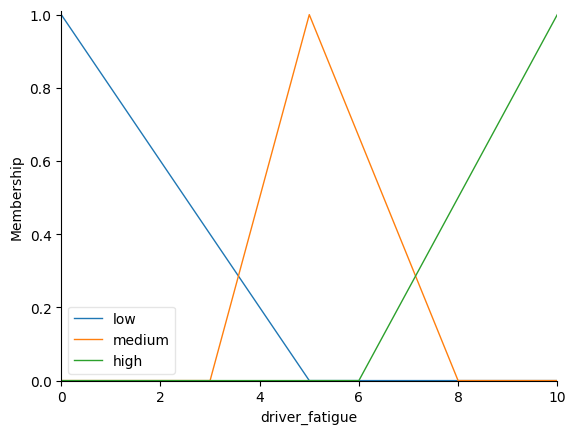

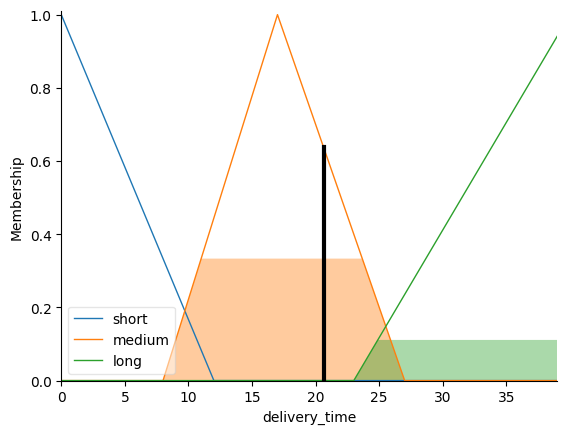

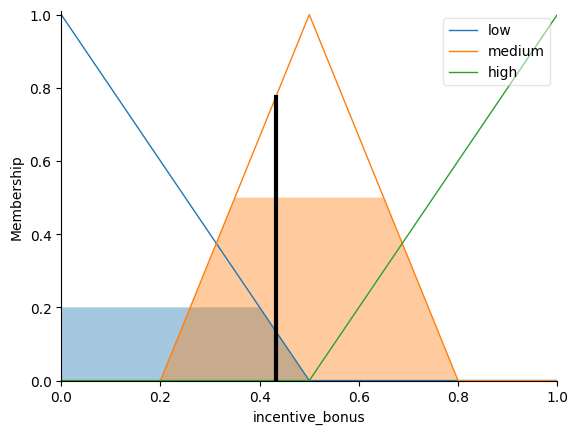

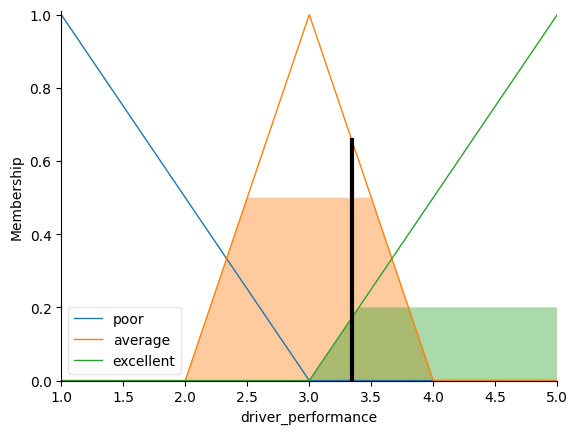

In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

traffic_condition = ctrl.Antecedent(np.arange(0, 11, 1), 'traffic_condition')
distance_to_customer = ctrl.Antecedent(np.arange(0, 16, 1), 'distance_to_customer')
weather_condition = ctrl.Antecedent(np.arange(0, 11, 1), 'weather_condition')
order_prep_time = ctrl.Antecedent(np.arange(0, 21, 1), 'order_prep_time')
driver_fatigue = ctrl.Antecedent(np.arange(0, 11, 1), 'driver_fatigue')

delivery_time = ctrl.Consequent(np.arange(0, 40, 1), 'delivery_time')
incentive_bonus = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'incentive_bonus')
driver_performance = ctrl.Consequent(np.arange(1, 6, 1), 'driver_performance')

traffic_condition['low'] = fuzz.trimf(traffic_condition.universe, [0, 0, 5])
traffic_condition['medium'] = fuzz.trimf(traffic_condition.universe, [3, 5, 8])
traffic_condition['high'] = fuzz.trimf(traffic_condition.universe, [6, 10, 10])

distance_to_customer['short'] = fuzz.trimf(distance_to_customer.universe, [0, 0, 5])
distance_to_customer['medium'] = fuzz.trimf(distance_to_customer.universe, [2, 6, 9])
distance_to_customer['long'] = fuzz.trimf(distance_to_customer.universe, [6, 15, 15])

weather_condition['clear'] = fuzz.trimf(weather_condition.universe, [0, 0, 5])
weather_condition['rainy'] = fuzz.trimf(weather_condition.universe, [3, 5, 8])
weather_condition['stormy'] = fuzz.trimf(weather_condition.universe, [6, 10, 10])

order_prep_time['fast'] = fuzz.trimf(order_prep_time.universe, [0, 0, 7])
order_prep_time['medium'] = fuzz.trimf(order_prep_time.universe, [3, 10, 17])
order_prep_time['slow'] = fuzz.trimf(order_prep_time.universe, [13, 20, 20])

driver_fatigue['low'] = fuzz.trimf(driver_fatigue.universe, [0, 0, 5])
driver_fatigue['medium'] = fuzz.trimf(driver_fatigue.universe, [3, 5, 8])
driver_fatigue['high'] = fuzz.trimf(driver_fatigue.universe, [6, 10, 10])

delivery_time['short'] = fuzz.trimf(delivery_time.universe, [0, 0, 12])
delivery_time['medium'] = fuzz.trimf(delivery_time.universe, [8, 17 ,27])
delivery_time['long'] = fuzz.trimf(delivery_time.universe, [23, 40, 40])

incentive_bonus['low'] = fuzz.trimf(incentive_bonus.universe, [0, 0, 0.5])
incentive_bonus['medium'] = fuzz.trimf(incentive_bonus.universe, [0.2, 0.5, 0.8])
incentive_bonus['high'] = fuzz.trimf(incentive_bonus.universe, [0.5, 1, 1])

driver_performance['poor'] = fuzz.trimf(driver_performance.universe, [1, 1, 3])
driver_performance['average'] = fuzz.trimf(driver_performance.universe, [2, 3, 4])
driver_performance['excellent'] = fuzz.trimf(driver_performance.universe, [3, 5, 5])

traffic_condition.view()
distance_to_customer.view()
weather_condition.view()
order_prep_time.view()
driver_fatigue.view()

rule1 = ctrl.Rule(traffic_condition['low'] & distance_to_customer['short'], delivery_time['short'])
rule2 = ctrl.Rule(traffic_condition['medium'] & distance_to_customer['medium'], delivery_time['medium'])
rule3 = ctrl.Rule(traffic_condition['high'] & distance_to_customer['long'], delivery_time['long'])

rule4 = ctrl.Rule(weather_condition['clear'], incentive_bonus['low'])
rule5 = ctrl.Rule(weather_condition['rainy'], incentive_bonus['medium'])
rule6 = ctrl.Rule(weather_condition['stormy'], incentive_bonus['high'])

rule7 = ctrl.Rule(order_prep_time['fast'] & traffic_condition['low'], delivery_time['short'])
rule8 = ctrl.Rule(order_prep_time['medium'] & traffic_condition['medium'], delivery_time['medium'])
rule9 = ctrl.Rule(order_prep_time['slow'] & traffic_condition['high'], delivery_time['long'])

rule10 = ctrl.Rule(driver_fatigue['low'], driver_performance['excellent'])
rule11 = ctrl.Rule(driver_fatigue['medium'], driver_performance['average'])
rule12 = ctrl.Rule(driver_fatigue['high'], driver_performance['poor'])

rule13 = ctrl.Rule(distance_to_customer['long'] & weather_condition['stormy'] & traffic_condition['high'], (delivery_time['long'], incentive_bonus['high']))
rule14 = ctrl.Rule(distance_to_customer['short'] & weather_condition['clear'] & traffic_condition['low'], (delivery_time['short'], incentive_bonus['low']))
rule15 = ctrl.Rule(driver_fatigue['high'] & traffic_condition['high'], (driver_performance['poor'], delivery_time['long']))

vidu210_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
vidu210_simulation = ctrl.ControlSystemSimulation(vidu210_system)
vidu210_simulation.input['traffic_condition'] = 7
vidu210_simulation.input['distance_to_customer']= 7
vidu210_simulation.input['weather_condition']= 4
vidu210_simulation.input['order_prep_time']= 6
vidu210_simulation.input['driver_fatigue']= 4
vidu210_simulation.compute()
print("Delivery time: ", vidu210_simulation.output['delivery_time'])
print("Delivery time: ", vidu210_simulation.output['incentive_bonus'])
print("Delivery time: ", vidu210_simulation.output['driver_performance'])

delivery_time.view(sim=vidu210_simulation)
incentive_bonus.view(sim=vidu210_simulation)
driver_performance.view(sim=vidu210_simulation)

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.9 MB/s eta 0:00:00


Giá cuối cùng được đề xuất:  6.7925155050982875


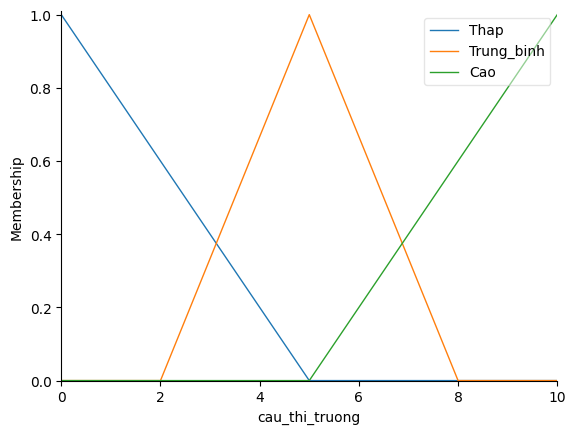

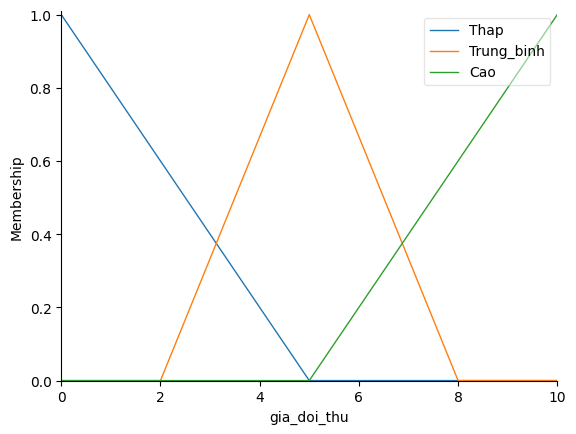

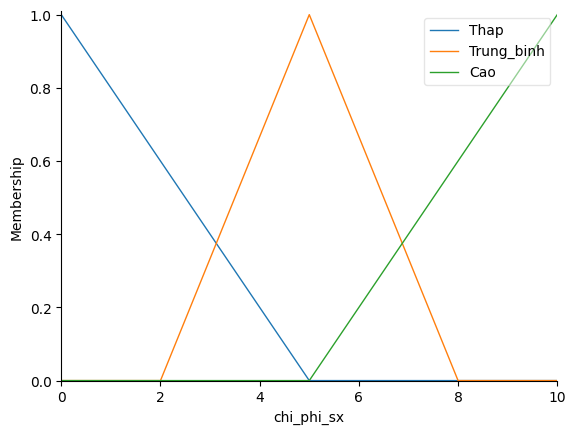

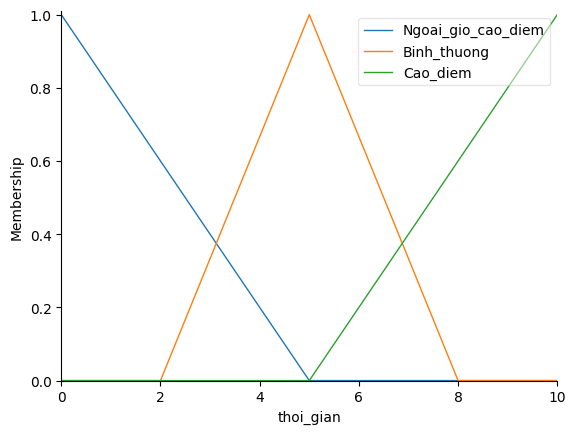

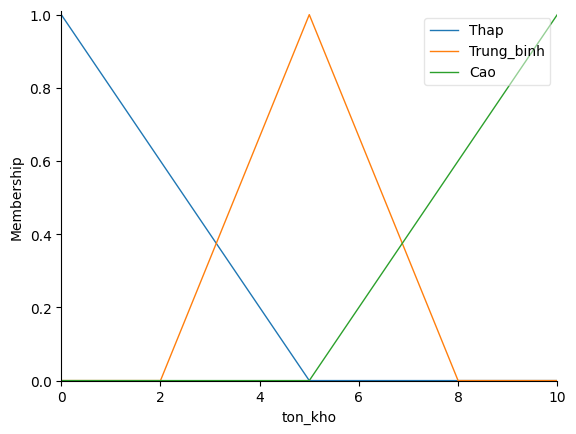

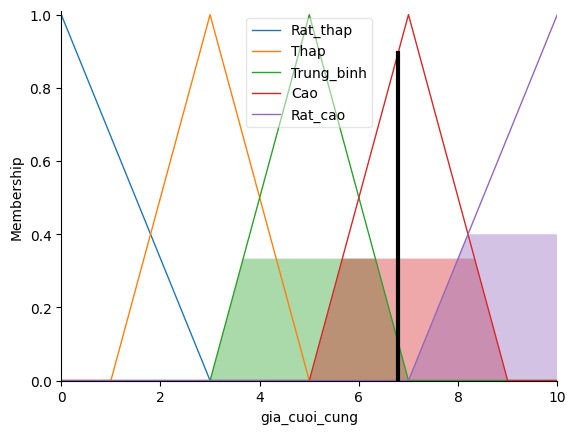

In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

cau_thi_truong = ctrl.Antecedent(np.arange(0, 11, 1), 'cau_thi_truong')
gia_doi_thu = ctrl.Antecedent(np.arange(0, 11, 1), 'gia_doi_thu')
chi_phi_sx = ctrl.Antecedent(np.arange(0, 11, 1), 'chi_phi_sx')
thoi_gian = ctrl.Antecedent(np.arange(0, 11, 1), 'thoi_gian')
ton_kho = ctrl.Antecedent(np.arange(0, 11, 1), 'ton_kho')

gia_cuoi_cung = ctrl.Consequent(np.arange(0, 11, 1), 'gia_cuoi_cung')

labels_3 = ['Thap', 'Trung_binh', 'Cao']
labels_5 = ['Rat_thap', 'Thap', 'Trung_binh', 'Cao', 'Rat_cao']

cau_thi_truong['Thap'] = fuzz.trimf(cau_thi_truong.universe, [0, 0, 5])
cau_thi_truong['Trung_binh'] = fuzz.trimf(cau_thi_truong.universe, [2, 5, 8])
cau_thi_truong['Cao'] = fuzz.trimf(cau_thi_truong.universe, [5, 10, 10])

gia_doi_thu['Thap'] = fuzz.trimf(gia_doi_thu.universe, [0, 0, 5])
gia_doi_thu['Trung_binh'] = fuzz.trimf(gia_doi_thu.universe, [2, 5, 8])
gia_doi_thu['Cao'] = fuzz.trimf(gia_doi_thu.universe, [5, 10, 10])

chi_phi_sx['Thap'] = fuzz.trimf(chi_phi_sx.universe, [0, 0, 5])
chi_phi_sx['Trung_binh'] = fuzz.trimf(chi_phi_sx.universe, [2, 5, 8])
chi_phi_sx['Cao'] = fuzz.trimf(chi_phi_sx.universe, [5, 10, 10])

thoi_gian['Ngoai_gio_cao_diem'] = fuzz.trimf(thoi_gian.universe, [0, 0, 5])
thoi_gian['Binh_thuong'] = fuzz.trimf(thoi_gian.universe, [2, 5, 8])
thoi_gian['Cao_diem'] = fuzz.trimf(thoi_gian.universe, [5, 10, 10])

ton_kho['Thap'] = fuzz.trimf(ton_kho.universe, [0, 0, 5])
ton_kho['Trung_binh'] = fuzz.trimf(ton_kho.universe, [2, 5, 8])
ton_kho['Cao'] = fuzz.trimf(ton_kho.universe, [5, 10, 10])

gia_cuoi_cung['Rat_thap'] = fuzz.trimf(gia_cuoi_cung.universe, [0, 0, 3])
gia_cuoi_cung['Thap'] = fuzz.trimf(gia_cuoi_cung.universe, [1, 3, 5])
gia_cuoi_cung['Trung_binh'] = fuzz.trimf(gia_cuoi_cung.universe, [3, 5, 7])
gia_cuoi_cung['Cao'] = fuzz.trimf(gia_cuoi_cung.universe, [5, 7, 9])
gia_cuoi_cung['Rat_cao'] = fuzz.trimf(gia_cuoi_cung.universe, [7, 10, 10])

cau_thi_truong.view()
gia_doi_thu.view()
chi_phi_sx.view()
thoi_gian.view()
ton_kho.view()

rule1 = ctrl.Rule(cau_thi_truong['Cao'] & gia_doi_thu['Cao'] & ton_kho['Thap'], gia_cuoi_cung['Rat_cao'])
rule2 = ctrl.Rule(cau_thi_truong['Cao'] & thoi_gian['Cao_diem'] & ton_kho['Thap'], gia_cuoi_cung['Rat_cao'])
rule3 = ctrl.Rule(cau_thi_truong['Trung_binh'] & chi_phi_sx['Cao'] & ton_kho['Thap'], gia_cuoi_cung['Rat_cao'])

rule4 = ctrl.Rule(cau_thi_truong['Cao'] & gia_doi_thu['Trung_binh'] & ton_kho['Trung_binh'], gia_cuoi_cung['Cao'])
rule5 = ctrl.Rule(cau_thi_truong['Trung_binh'] & gia_doi_thu['Cao'] & ton_kho['Thap'], gia_cuoi_cung['Cao'])
rule6 = ctrl.Rule(cau_thi_truong['Trung_binh'] & thoi_gian['Cao_diem'] & ton_kho['Trung_binh'], gia_cuoi_cung['Cao'])

rule7 = ctrl.Rule(cau_thi_truong['Trung_binh'] & gia_doi_thu['Trung_binh'] & ton_kho['Trung_binh'], gia_cuoi_cung['Trung_binh'])
rule8 = ctrl.Rule(cau_thi_truong['Trung_binh'] & gia_doi_thu['Cao'] & ton_kho['Trung_binh'], gia_cuoi_cung['Trung_binh'])
rule9 = ctrl.Rule(cau_thi_truong['Thap'] & gia_doi_thu['Cao'] & ton_kho['Trung_binh'], gia_cuoi_cung['Trung_binh'])
rule10 = ctrl.Rule(cau_thi_truong['Trung_binh'] & chi_phi_sx['Trung_binh'] & ton_kho['Trung_binh'], gia_cuoi_cung['Trung_binh'])

rule11 = ctrl.Rule(cau_thi_truong['Thap'] & gia_doi_thu['Thap'] & ton_kho['Cao'], gia_cuoi_cung['Thap'])
rule12 = ctrl.Rule(cau_thi_truong['Trung_binh'] & chi_phi_sx['Trung_binh'] & ton_kho['Cao'], gia_cuoi_cung['Thap'])
rule13 = ctrl.Rule(cau_thi_truong['Thap'] & thoi_gian['Ngoai_gio_cao_diem'] & ton_kho['Cao'], gia_cuoi_cung['Thap'])

rule14 = ctrl.Rule(cau_thi_truong['Thap'] & gia_doi_thu['Thap'] & ton_kho['Cao'], gia_cuoi_cung['Rat_thap'])
rule15 = ctrl.Rule(cau_thi_truong['Thap'] & thoi_gian['Ngoai_gio_cao_diem'] & ton_kho['Cao'], gia_cuoi_cung['Rat_thap'])
rule16 = ctrl.Rule(cau_thi_truong['Trung_binh'] & gia_doi_thu['Thap'] & ton_kho['Cao'], gia_cuoi_cung['Rat_thap'])

vidu211_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])
vidu211_simulation = ctrl.ControlSystemSimulation(vidu211_control)

vidu211_simulation.input['cau_thi_truong'] = 7
vidu211_simulation.input['gia_doi_thu'] = 6
vidu211_simulation.input['chi_phi_sx'] = 5
vidu211_simulation.input['thoi_gian'] = 8
vidu211_simulation.input['ton_kho'] = 3

vidu211_simulation.compute()

print("Giá cuối cùng được đề xuất: ", vidu211_simulation.output['gia_cuoi_cung'])

gia_cuoi_cung.view(sim=vidu211_simulation)